## To run this notebook, first run main.py.

In [92]:
import numpy as np
import healpy as hp
import pickle
import matplotlib.pyplot as plt
from pixell import enmap, enplot, curvedsky
from input import Info
import yaml

In [93]:
font = {'size'   : 20, 'family':'STIXGeneral'}
plt.rcParams.update({
     'text.usetex': True,
     'font.family': 'serif',
     'font.sans-serif': ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

## Read in info from yaml file (modify yaml_file to be the path to the same file with which main.py was run)

In [94]:
yaml_file = 'example_yaml_files/laptop.yaml'
inp = Info(yaml_file)

## Plotting Definitions

In [95]:
colors = ['red', 'blue', 'green']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot']
ells = np.arange(inp.ellmax+1)
to_dl = ells*(ells+1)/2/np.pi
freqs = [220, 150, 90]
map_types = ['I', 'Q', 'U']
spectra_types = ['TT', 'EE', 'BB', 'TE', 'EB', 'TB']


## Beams

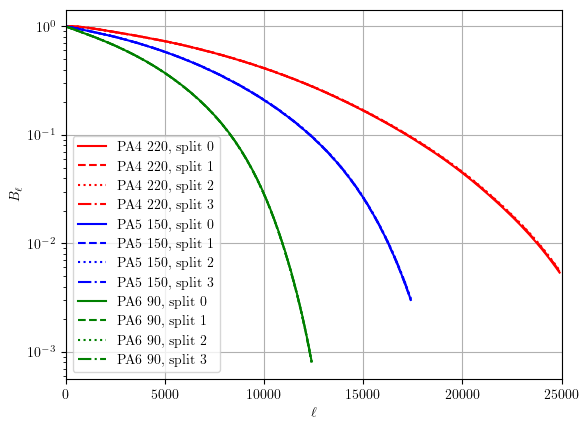

In [97]:
if inp.plots_to_make == 'all' or 'beams' in inp.plots_to_make:
    colors = ['red', 'blue', 'green']
    linestyles = ['solid', 'dashed', 'dotted', 'dashdot']
    plt.clf()
    for freq in range(3):
        for split in range(4):
            if freq==0:
                beamfile = f'{inp.beam_dir}/set{split}_pa4_f220_night_beam_tform_jitter_cmb.txt'
                label = f'PA4 220, split {split}'
            elif freq==1:
                beamfile = f'{inp.beam_dir}/set{split}_pa5_f150_night_beam_tform_jitter_cmb.txt'
                label = f'PA5 150, split {split}'
            elif freq==2:
                beamfile = f'{inp.beam_dir}/set{split}_pa6_f090_night_beam_tform_jitter_cmb.txt'
                label = f'PA6 90, split {split}'
            data = np.loadtxt(beamfile)
            l = data[:,0]
            Bl = data[:,1]
            Bl /= Bl[0]
            plt.plot(l, Bl, label=label, color=colors[freq], linestyle=linestyles[split])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$B_\ell$')
    plt.yscale('log')
    plt.xlim(0,25000)


## Frequency Map Power Spectra Before Beam Convolution

<Figure size 640x480 with 0 Axes>

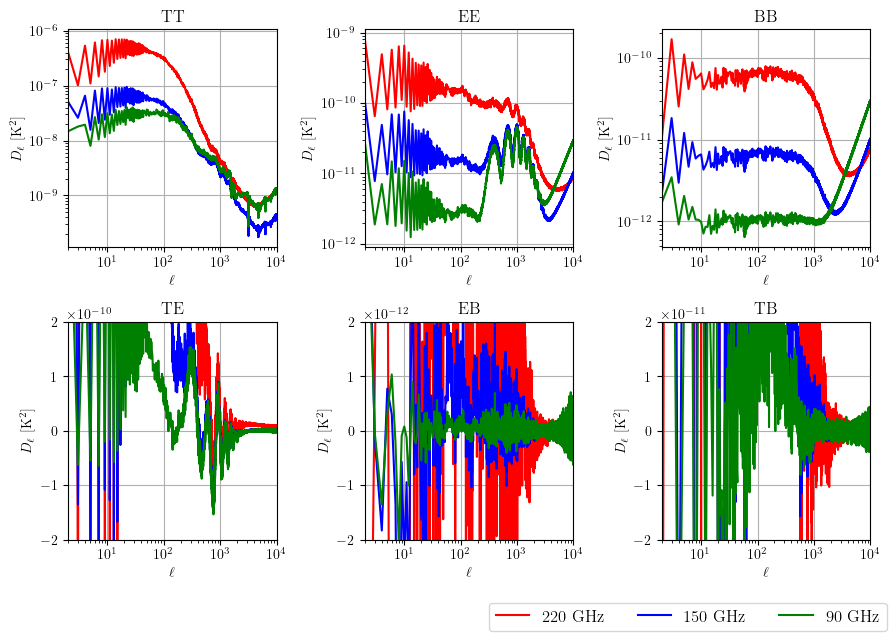

In [99]:
if inp.plots_to_make == 'all' or 'freq_maps_no_beam' in inp.plots_to_make:
    spectra_no_beam = pickle.load(open(f'{inp.output_dir}/spectra_no_beam.p', 'rb'))
    plt.clf()
    if inp.pol:
        fig, axs = plt.subplots(2, 3, figsize=(9,6))
        axs = axs.flatten()
        for t in range(6):
            plt.axes(axs[t])
            for freq in range(3):
                plt.plot(ells[2:], (to_dl*spectra_no_beam[freq,t])[2:], label=f'{freqs[freq]} GHz', color=colors[freq])  
            plt.grid()
            plt.xlabel(r'$\ell$')
            plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
            plt.title(f'{spectra_types[t]}')
            if t <= 2:
                plt.yscale('log')
            elif t==3:
                plt.ylim(-0.02e-8, 0.02e-8)
            elif t==4:
                plt.ylim(-0.02e-10, 0.02e-10)
            elif t==5:
                plt.ylim(-0.02e-9, 0.02e-9)
            plt.xlim(2,inp.ellmax)
            plt.xscale('log')
        handles, labels = axs[-1].get_legend_handles_labels()
        fig.legend(handles, labels, fontsize=12, bbox_to_anchor=(1.0, 0.), ncol=3)
        plt.tight_layout()
        


## Frequency Map Power Spectra After Beam Convolution

<Figure size 640x480 with 0 Axes>

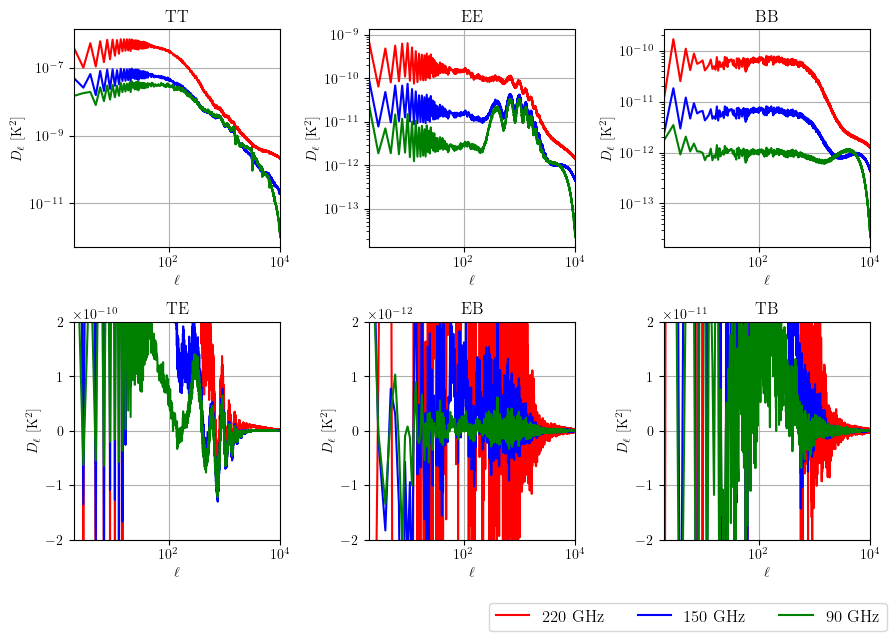

In [88]:
if inp.plots_to_make == 'all' or 'beam_convolved_maps' in inp.plots_to_make:
    beam_convolved_spectra = pickle.load(open(f'{inp.output_dir}/beam_convolved_spectra.p', 'rb'))
    if not inp.pol:
        plt.clf()
        for freq in range(3):
            for split in range(4):
                spectra_to_plot = beam_convolved_spectra[freq,split]
                plt.plot(ells[2:], (to_dl*spectra_to_plot)[2:], label=f'{freqs[freq]} GHz, split {split}', color=colors[freq], linestyle=linestyles[split])
        plt.xlabel(r'$\ell$')
        plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
        plt.yscale('log')
        plt.xlim(2, inp.ellmax)
        plt.grid()
        plt.legend()
    else:
        plt.clf()
        fig, axs = plt.subplots(2, 3, figsize=(9,6))
        axs = axs.flatten()
        for t in range(6):
            plt.axes(axs[t])
            for freq in range(3):
                split = 0
                spectra_to_plot = beam_convolved_spectra[freq,split,t]
                plt.plot(ells[2:], (to_dl*spectra_to_plot)[2:], label=f'{freqs[freq]} GHz', color=colors[freq])
            plt.xlabel(r'$\ell$')
            plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
            plt.grid()
            plt.title(f'{spectra_types[t]}')
            if t <= 2:
                plt.yscale('log')
            elif t==3:
                plt.ylim(-0.02e-8, 0.02e-8)
            elif t==4:
                plt.ylim(-0.02e-10, 0.02e-10)
            elif t==5:
                plt.ylim(-0.02e-9, 0.02e-9)
            plt.xlim(2, inp.ellmax)
            plt.xscale('log')
        handles, labels = axs[-1].get_legend_handles_labels()
        fig.legend(handles, labels, fontsize=12, bbox_to_anchor=(1.0, 0.), ncol=3)
        plt.tight_layout()



## Final CAR Map Power Spectra (After Adding Noise)

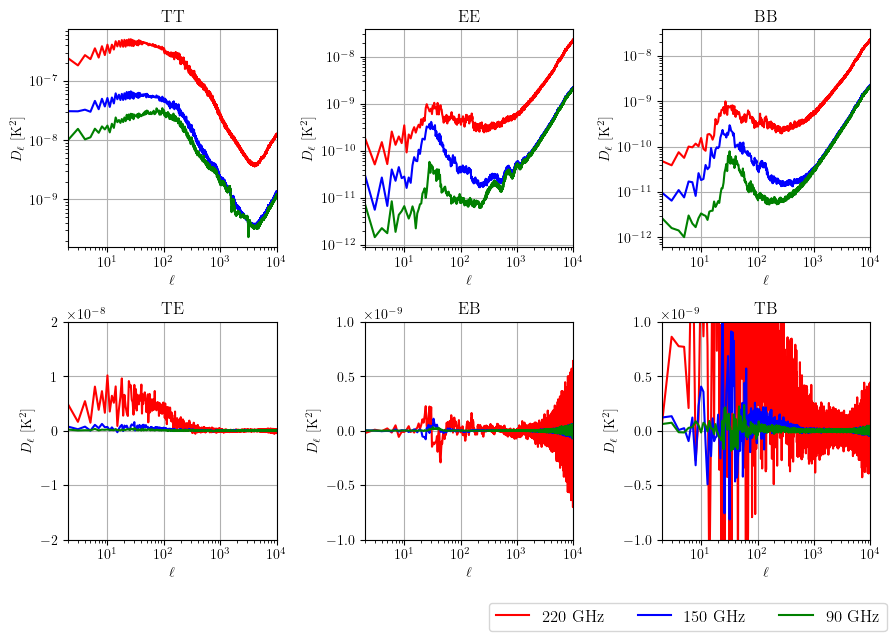

In [100]:
if inp.plots_to_make == 'all' or 'CAR_maps' in inp.plots_to_make:
    CAR_spectra = pickle.load(open(f'{inp.output_dir}/CAR_spectra.p', 'rb'))
    if not inp.pol:
        for i, freq in enumerate([220, 150, 90]):
            plt.plot(ells, to_dl*CAR_spectra[i], label=f'{freq} GHz')
        plt.xlabel(r'$\ell$')
        plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
        plt.xlim(2, inp.ellmax)
        plt.grid()
        plt.legend()

    else:
        fig, axs = plt.subplots(2, 3, figsize=(9,6))
        axs = axs.flatten()
        spectra_types_here = ['T', 'E', 'B']
        axis_mapping = {(0,0):0, (0,1):3, (0,2):5, (1,1):1, (1,2):4, (2,2):2}
        for i, freq in enumerate([220, 150, 90]):
            ax = 0
            for t1 in range(3):
                for t2 in range(t1,3):
                    t = axis_mapping[(t1,t2)]
                    plt.axes(axs[t])
                    ax += 1
                    plt.plot(ells[2:], (to_dl*CAR_spectra[i, ax-1])[2:], label=f'{freq} GHz', color=colors[i])
                    plt.title(f'{spectra_types_here[t1]}{spectra_types_here[t2]}')
                    plt.xlabel(r'$\ell$')
                    plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
                    plt.grid()
                    plt.xlim(2, inp.ellmax)
                    if t <= 2:
                        plt.yscale('log')
                    elif t==3:
                        plt.ylim(-0.02e-6, 0.02e-6)
                    elif t==4:
                        plt.ylim(-0.01e-7, 0.01e-7)
                    elif t==5:
                        plt.ylim(-0.01e-7, 0.01e-7)
                    plt.xscale('log')
        handles, labels = axs[-1].get_legend_handles_labels()
        fig.legend(handles, labels, fontsize=12, bbox_to_anchor=(1.0, 0.), ncol=3)
        plt.tight_layout()



## Power Spectra of all Components

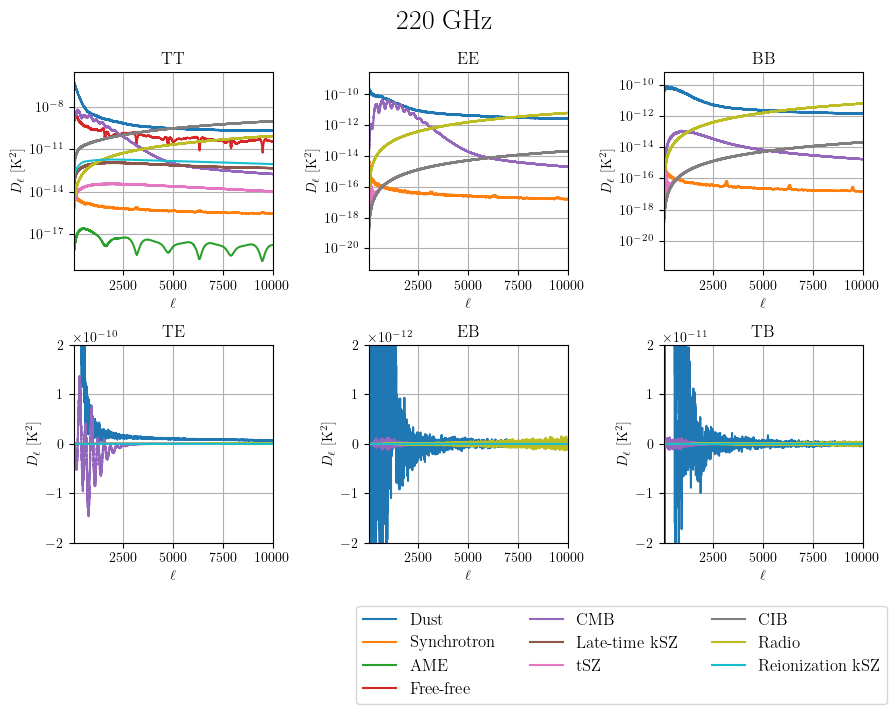

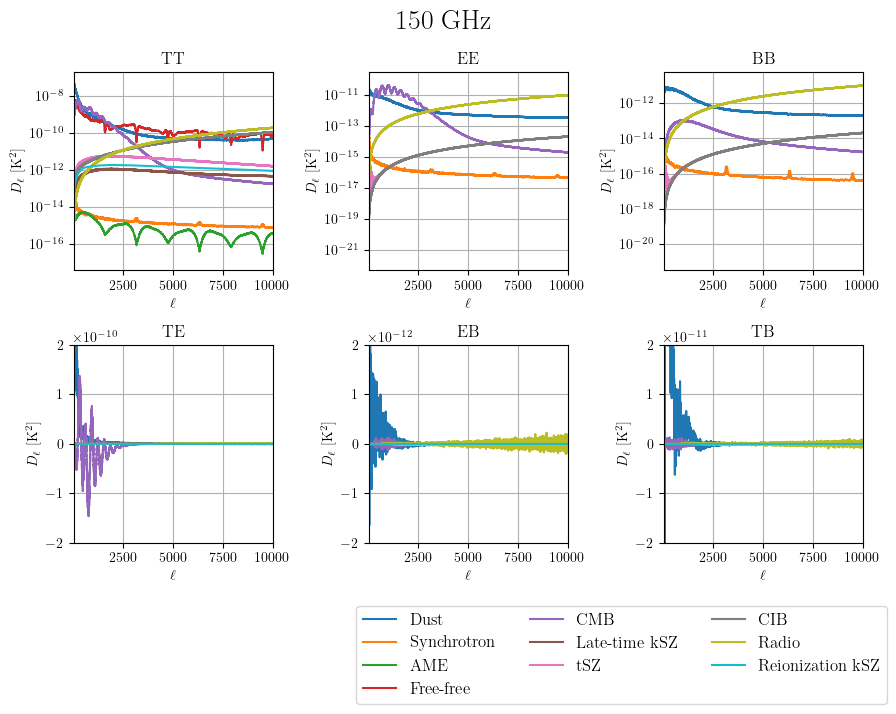

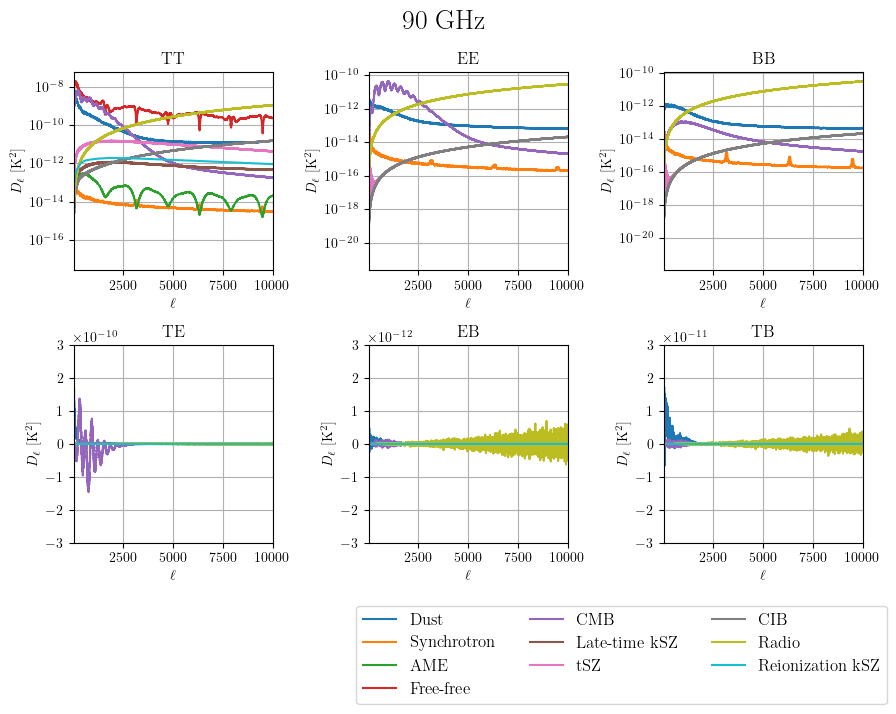

In [90]:
if inp.plots_to_make == 'all' or 'all_comp_spectra' in inp.plots_to_make:
    for i, freq in enumerate([220, 150, 90]):
        ells = np.arange(inp.ellmax+1)
        to_dl = ells*(ells+1)/2/np.pi
        gal_spectra = pickle.load( open(f'{inp.output_dir}/gal_comp_spectra_{freq}.p', 'rb'))
        extragal_spectra = pickle.load( open(f'{inp.output_dir}/extragal_comp_spectra_{freq}.p', 'rb'))
        gal_comps = ['Dust', 'Synchrotron', 'AME', 'Free-free']
        extragal_comps = ['CMB', 'Late-time kSZ', 'tSZ', 'CIB', 'Radio', 'Reionization kSZ']
        modes = ['TT', 'EE', 'BB', 'TE', 'EB', 'TB']
        if not inp.pol:
            plt.clf()
            for c in range(len(gal_spectra)):
                plt.plot(ells[2:], (to_dl*gal_spectra[c])[2:], label=gal_comps[c])
            for c in range(len(extragal_spectra)):
                plt.plot(ells[2:], (to_dl*extragal_spectra[c])[2:], label=extragal_comps[c])
            plt.yscale('log')
            plt.xlabel(r'$\ell$')
            plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
            plt.grid()
            plt.legend()
        else:
            fig, axs = plt.subplots(2, 3, figsize=(9,6))
            axs = axs.flatten()
            for m in range(6):
                plt.axes(axs[m])
                for c in range(len(gal_spectra)):
                    plt.plot(ells[2:], (to_dl*gal_spectra[c,m])[2:], label=gal_comps[c])
                for c in range(len(extragal_spectra)):
                    plt.plot(ells[2:], (to_dl*extragal_spectra[c,m])[2:], label=extragal_comps[c])
                if m < 3:
                    plt.yscale('log')
                ylims = [0.02e-8, 0.02e-8, 0.03e-8]
                if m==3:
                    plt.ylim(-ylims[i], ylims[i])
                elif m==4:
                    plt.ylim(-ylims[i]*10**(-2), ylims[i]*10**(-2))
                elif m==5:
                    plt.ylim(-ylims[i]*10**(-1), ylims[i]*10**(-1))
                plt.xlabel(r'$\ell$')
                plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
                plt.grid()
                plt.xlim(2, inp.ellmax)
                plt.title(f'{modes[m]}')
            handles, labels = axs[-1].get_legend_handles_labels()
            fig.legend(handles, labels, fontsize=12, bbox_to_anchor=(1.0, 0.), ncol=3)
            plt.suptitle(f'{freq} GHz', fontsize=20)
            plt.tight_layout()



## TT Spectra of Extragalactic Components

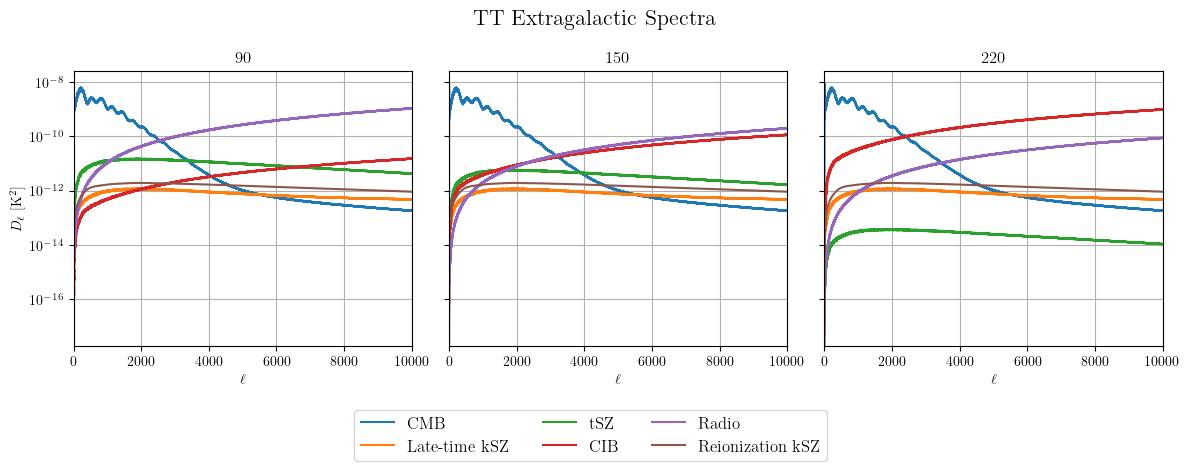

In [101]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
axs = axs.flatten()
for i, freq in enumerate([90, 150, 220]):
    plt.axes(axs[i])
    ells = np.arange(inp.ellmax+1)
    to_dl = ells*(ells+1)/2/np.pi
    gal_spectra = pickle.load( open(f'{inp.output_dir}/gal_comp_spectra_{freq}.p', 'rb'))
    extragal_spectra = pickle.load( open(f'{inp.output_dir}/extragal_comp_spectra_{freq}.p', 'rb'))
    extragal_comps = ['CMB', 'Late-time kSZ', 'tSZ', 'CIB', 'Radio', 'Reionization kSZ']
    for c in range(len(extragal_spectra)):
        plt.plot(ells[2:], (to_dl*extragal_spectra[c,0])[2:], label=extragal_comps[c])
    plt.yscale('log')
    plt.xlabel(r'$\ell$')
    if i==0:
        plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
    plt.grid()
    plt.title(f'{freq}')
    plt.xlim(0,10000)
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, fontsize=12, bbox_to_anchor=(0.7, 0.), ncol=3)
plt.suptitle('TT Extragalactic Spectra', fontsize=16)
plt.tight_layout()

